## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE =  1e-2
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95
MOMENTUM = [0.95, 0.5, 0]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for MOM in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (MOM))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(MOM)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0810 18:23:27.635629  7720 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 18:23:27.975754  7720 deprecation.py:323] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.8323 - acc: 0.3461 - val_loss: 1.6832 - val_acc: 0.3945
Epoch 2/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5979 - acc: 0.4337 - val_loss: 1.5887 - val_acc: 0.4345
Epoch 3/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5101 - acc: 0.4642 - val_loss: 1.5822 - val_acc: 0.4377
Epoch 4/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4438 - acc: 0.4845 - val_loss: 1.5162 - val_acc: 0.4633
Epoch 5/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.4033 - acc: 0.4999 - val_loss: 1.4462 - val_acc: 0.4827
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.3584 - acc: 0.5174 - val_loss: 1.5085 - val_acc: 0.4603
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.3252 - acc: 0.5301 - val_loss: 1.5058 - val_

50000/50000 [==============================] - 6s 125us/step - loss: 1.8300 - acc: 0.3565 - val_loss: 1.8433 - val_acc: 0.3255
Epoch 3/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7555 - acc: 0.3799 - val_loss: 1.7827 - val_acc: 0.3536
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6962 - acc: 0.3987 - val_loss: 1.7221 - val_acc: 0.3962
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6528 - acc: 0.4172 - val_loss: 1.7742 - val_acc: 0.3675
Epoch 6/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6176 - acc: 0.4303 - val_loss: 1.6142 - val_acc: 0.4289
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5868 - acc: 0.4424 - val_loss: 1.6116 - val_acc: 0.4157
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5616 - acc: 0.4483 - val_loss: 1.5695 - val_acc: 0.4371
Epoch 9/50
50000/50000 [=========================

50000/50000 [==============================] - 5s 104us/step - loss: 1.8165 - acc: 0.3589 - val_loss: 1.7950 - val_acc: 0.3638
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7708 - acc: 0.3767 - val_loss: 1.7498 - val_acc: 0.3831
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7348 - acc: 0.3897 - val_loss: 1.7721 - val_acc: 0.3694
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7071 - acc: 0.3994 - val_loss: 1.7354 - val_acc: 0.3746
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.6805 - acc: 0.4089 - val_loss: 1.6703 - val_acc: 0.4056
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6549 - acc: 0.4169 - val_loss: 1.6617 - val_acc: 0.4076
Epoch 9/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6349 - acc: 0.4256 - val_loss: 1.6427 - val_acc: 0.4107
Epoch 10/50
50000/50000 [=========================

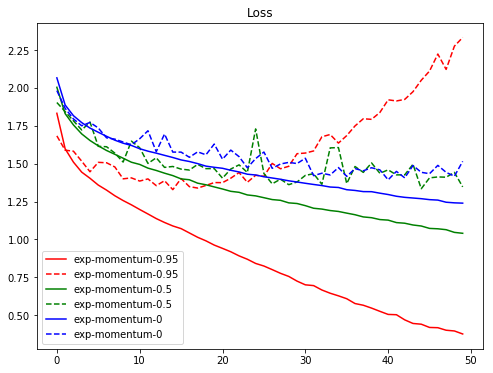

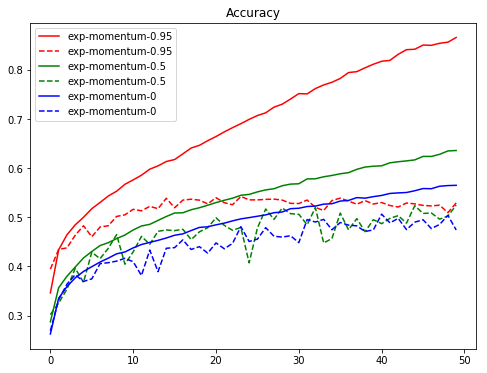

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for MOM in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (MOM))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=MOM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(MOM)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.9958 - acc: 0.2884 - val_loss: 1.9113 - val_acc: 0.3214
Epoch 2/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8109 - acc: 0.3638 - val_loss: 1.7654 - val_acc: 0.3737
Epoch 3/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7315 - acc: 0.3927 - val_loss: 1.7405 - val_acc: 0.3885
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6796 - acc: 0.4111 - val_loss: 1.6767 - val_acc: 0.4061
Epoch 5/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6353 - acc: 0.4254 - val_loss: 1.6292 - val_acc: 0.4340
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5987 - acc: 0.4397 - val_loss: 1.5989 - val_acc: 0.4301
Epoch 7/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5668 - acc: 0.4491 - val_loss: 1.5862 - v

50000/50000 [==============================] - 6s 123us/step - loss: 1.8827 - acc: 0.3345 - val_loss: 1.8718 - val_acc: 0.3218
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.8140 - acc: 0.3602 - val_loss: 1.7991 - val_acc: 0.3692
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7731 - acc: 0.3743 - val_loss: 1.8518 - val_acc: 0.3233
Epoch 5/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7378 - acc: 0.3871 - val_loss: 1.7230 - val_acc: 0.3904
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7072 - acc: 0.3991 - val_loss: 1.7718 - val_acc: 0.3779
Epoch 7/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6833 - acc: 0.4096 - val_loss: 1.6727 - val_acc: 0.4159
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6579 - acc: 0.4173 - val_loss: 1.6840 - val_acc: 0.4076 - loss: 1.6594 
Epoch 9/50
50000/50000 [=======

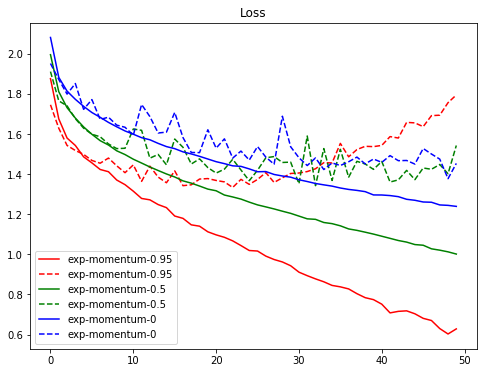

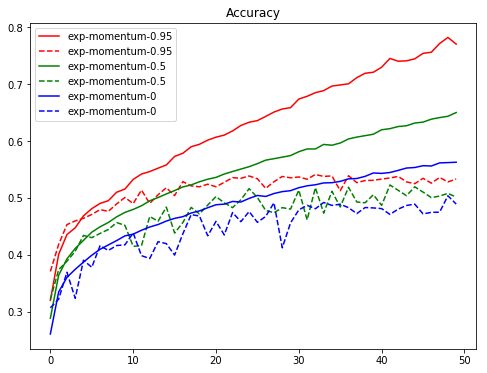

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()